In [1]:
import pybinding as pb
import numpy as np
from numpy import sqrt as sqrt
import matplotlib.pyplot as plt
from numpy import exp, dot, einsum

# We define the Lieb lattice


In [173]:
a_0 = 1 #lattice constant

# onsite energies
Ea = 1 
Eb = 1
Ec = 1

# lattice vectors
a1 = np.array([a_0, 0])
a2 = np.array([0, a_0])
lieb_lattice = pb.Lattice(a1=a1, a2=a2)
lieb_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([a_0/2, 0]), Eb), ('C', np.array([0, a_0/2]), Ec))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1

lieb_lattice.add_hoppings(
    ([0, 0], 'A', 'B', t),
    ([-1, 0], 'A', 'B', t),
    ([0, 0], 'A', 'C', t),
    ([0, -1], 'A', 'C', t),
)

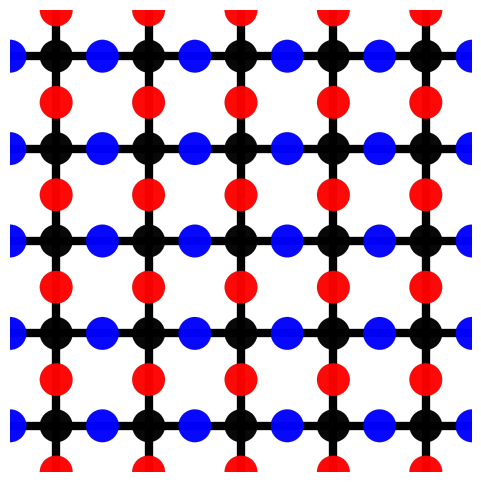

In [174]:
plt.figure(figsize=(6, 6))
lieb_model = pb.Model(
    lieb_lattice,
    pb.translational_symmetry()
)
lieb_model.plot(num_periods=5,
          hopping = {
  "width": 10, "color" : "black", "blend" : 1,
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 })
plt.gca().axis('off');
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5);

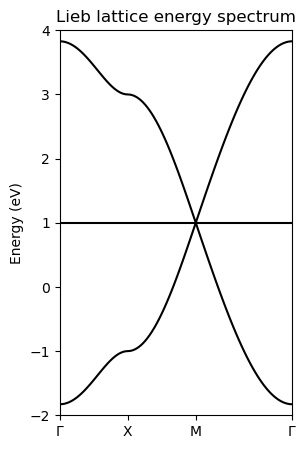

In [176]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(lieb_model)
G1, G2 = lieb_lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
bands = solver.calc_bands(Gamma, X, M, Gamma)
lieb_energies = bands.energy
k_path = bands.k_path
plt.plot(lieb_energies, color="black")
plt.xticks(k_path.point_indices, [r'$\Gamma$', 'X', 'M', r'$\Gamma$'])
plt.xlim(0, len(k_path)-1)
plt.ylim(-2, 4)
plt.yticks(np.linspace(-2, 4, num=7));
plt.title("Lieb lattice energy spectrum");
plt.ylabel("Energy (eV)");

# Bilayer square lattice

In [177]:
# We define the Lieb lattice
a = 1 #interlayer constant

# onsite energies
Ea = 0 
Eb = 0

# lattice vectors
a1 = np.array([a, 0, 0])
a2 = np.array([0, a, 0])
bilayer_lattice = pb.Lattice(a1=a1, a2=a2)
bilayer_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([0, 0, a]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t1 = -1
t2 = -2
t3 = -1

bilayer_lattice.add_hoppings(
    ([1, 0], 'A', 'A', t1),
    ([0, -1], 'A', 'A', t1),
    
    ([1, 0], 'B', 'B', t1),
    ([0, -1], 'B', 'B', t1),
    
    ([0, 0], 'A', 'B', t2),
    
    ([1, 0], 'A', 'B', t3),
    ([0, 1], 'A', 'B', t3),
    ([-1, 0], 'A', 'B', t3),
    ([0, -1], 'A', 'B', t3),
)

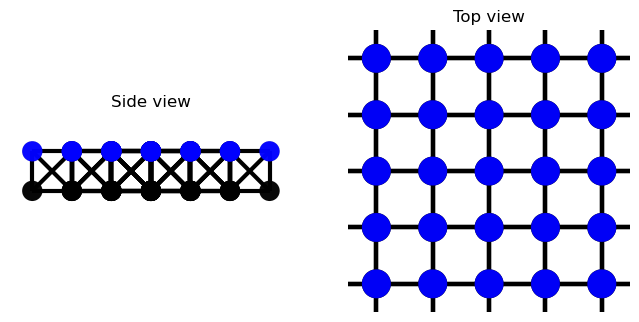

In [178]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
bilayer_model = pb.Model(
    bilayer_lattice,
    pb.translational_symmetry()
)
plt.sca(ax1)
bilayer_model.plot(num_periods=3,
          hopping = { 
  "width": 5, "color" : "black", "blend" : 1
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 }, axes="xz")
plt.gca().axis('off');
plt.title("Side view")

plt.sca(ax2)
bilayer_model.plot(num_periods=6,
          hopping = { 
  "width": 5, "color" : "black", "blend" : 1
}, sites={"cmap":["black", "blue", "red"], "blend" : 1 }, axes="xy")
plt.gca().axis('off');
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)

plt.title("Top view");

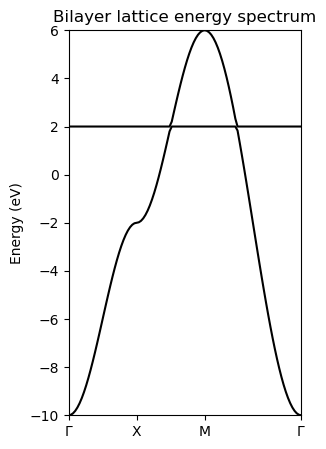

In [180]:
plt.figure(figsize=(3, 5))
solver = pb.solver.lapack(bilayer_model)
G1, G2 = bilayer_lattice.reciprocal_vectors()
G1 = G1[0:2]
G2 = G2[0:2]
Gamma = np.array([0, 0])
X = 1/2*G1
M = 1/2*G1+1/2*G2
bands = solver.calc_bands(Gamma, X, M, Gamma)
energies = bands.energy
k_path = bands.k_path
plt.plot(energies, color="black")
plt.xticks(k_path.point_indices, [r'$\Gamma$', 'X', 'M', r'$\Gamma$'])
plt.xlim(0, len(k_path)-1)
plt.ylim(-10, 6)
plt.title("Bilayer lattice energy spectrum");
plt.yticks(np.linspace(-10, 6, num=9));
plt.ylabel("Energy (eV)");

# BCC lattice (analytic versus numeric)

In [181]:
a = 1 #lattice constant
# onsite energies
Ea = 0 
# lattice vectors
a1 = np.array([-a/2, a/2, a/2])
a2 = np.array([a/2, -a/2, a/2])
a3 = np.array([a/2, a/2, -a/2])

bcc_lattice = pb.Lattice(a1=a1, a2=a2, a3=a3)
bcc_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1

bcc_lattice.add_hoppings(
    ([1, 0, 0], 'A', 'A', t),
    ([0, 1, 0], 'A', 'A', t),
    ([0, 0, 1], 'A', 'A', t),
    ([1, 1, 1], 'A', 'A', t),
)

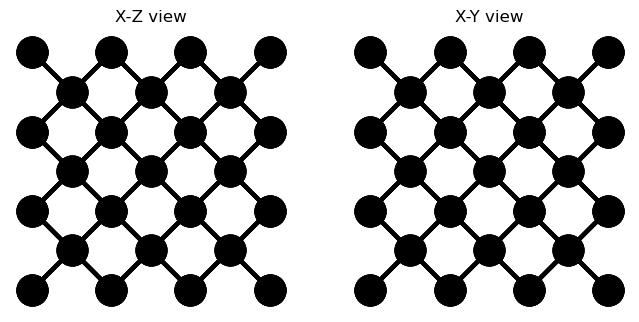

In [182]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
bcc_model = pb.Model(
    bcc_lattice,
    pb.translational_symmetry()
)
plt.sca(ax1)
bcc_model.plot(num_periods=3,
          hopping = { 
  "width": 5, "color" : "black", "blend" : 1
}, sites={"cmap":["black"], "blend" : 1 }, axes="xz")
plt.gca().axis('off');
plt.title("X-Z view")

plt.sca(ax2)
bcc_model.plot(num_periods=3,
          hopping = { 
  "width": 5, "color" : "black", "blend" : 1
}, sites={"cmap":["black"], "blend" : 1 }, axes="xy")
plt.title("X-Y view")
plt.gca().axis('off');

In [184]:
solver = pb.solver.lapack(bcc_model)
G1, G2, G3 = bcc_lattice.reciprocal_vectors()
G1 = G1[0:3]
G2 = G2[0:3]
G3 = G3[0:3]
Gamma = np.array([0, 0, 0])
X = 1/2*G1

In [185]:
bands = solver.calc_bands(Gamma, X, Gamma)
k_path = bands.k_path
energies = bands.energy
analytic_result = 8*t*np.prod(np.cos(np.array(k_path) * a/2), axis=1);

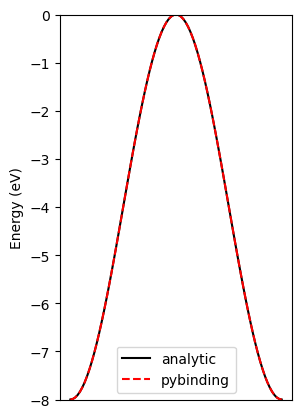

In [186]:
plt.figure(figsize=(3, 5))
plt.plot(analytic_result, label="analytic", color="black")
plt.plot(energies, linestyle="dashed", label="pybinding", color="red")
plt.xticks([])
plt.ylim(8*t, 0)
plt.ylabel("Energy (eV)")
plt.legend();

# Solving the BCC problem in the conventional cell

In [188]:
a = 1 #lattice constant

# onsite energies
Ea = Eb = 0 

# lattice vectors
a1 = np.array([a, 0, 0])
a2 = np.array([0, a, 0])
a3 = np.array([0, 0, a])

bcc_conv_lattice = pb.Lattice(a1=a1, a2=a2, a3=a3)
bcc_conv_lattice.add_sublattices(
    ('A', np.array([0, 0]), Ea), ('B', np.array([1/2, 1/2, 1/2]), Eb))  # add an atom called 'A' at position [0, 0]

# nearest-neighbor hopping
t = -1

bcc_conv_lattice.add_hoppings(
    ([0, 0, 0], 'A', 'B', t),
    ([-1, 0, 0], 'A', 'B', t),
    ([0, -1, 0], 'A', 'B', t),
    ([-1, -1, 0], 'A', 'B', t),
    ([0, 0, -1], 'A', 'B', t),
    ([-1, 0, -1], 'A', 'B', t),
    ([0, -1, -1], 'A', 'B', t),
    ([-1, -1, -1], 'A', 'B', t),
)

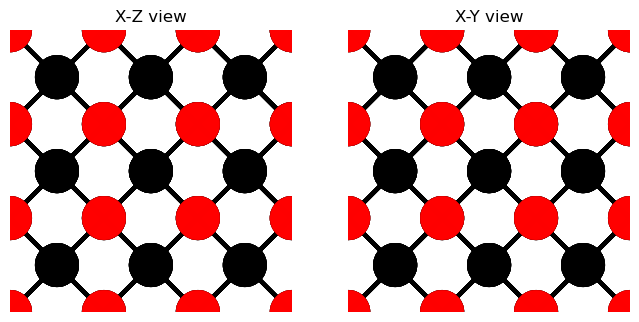

In [195]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8))
bcc_conv_model = pb.Model(
    bcc_conv_lattice,
    pb.translational_symmetry()
)
plt.sca(ax1)
bcc_conv_model.plot(num_periods=3,
          hopping = { 
  "width": 5, "color" : "black", "blend" : 1
}, sites={"cmap":["black", "red"], "blend" : 1 }, axes="xz")
plt.gca().axis('off');
plt.title("X-Z view")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.sca(ax2)
bcc_conv_model.plot(num_periods=3,
          hopping = { 
  "width": 5, "color" : "black", "blend" : 1
}, sites={"cmap":["black", "red"], "blend" : 1 }, axes="xy")
plt.title("X-Y view")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.gca().axis('off');

In [196]:
solver = pb.solver.lapack(bcc_conv_model)
G1, G2, G3 = bcc_lattice.reciprocal_vectors()
G1 = G1[0:3]
G2 = G2[0:3]
G3 = G3[0:3]
Gamma = np.array([0, 0, 0])
X = 1/2*G1

In [199]:
bands = solver.calc_bands(Gamma, X, Gamma)
k_path = bands.k_path
energies = bands.energy

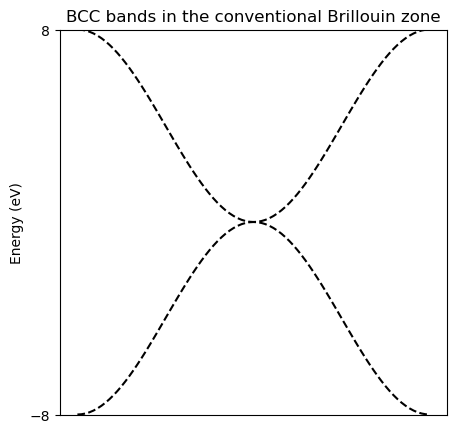

In [202]:
plt.figure(figsize=(5, 5))
plt.plot(energies, linestyle="dashed", color="black")
plt.yticks([8*t, -8*t]);
plt.ylim(8*t, -8*t)
plt.xticks([])
plt.title("BCC bands in the conventional Brillouin zone");
plt.ylabel("Energy (eV)");

# Folding in the primitive reciprocal lattice to see equivalence

In [215]:
solver_primitive = pb.solver.lapack(bcc_model)
solver_conventional = pb.solver.lapack(bcc_conv_model)
G1, G2, G3 = bcc_conv_lattice.reciprocal_vectors()
G1 = G1[0:3]
G2 = G2[0:3]
G3 = G3[0:3]
Gamma = np.array([0, 0, 0])
X = 1/2*G1

In [218]:
bands_primitive_1 = solver_primitive.calc_bands(Gamma, X, Gamma)
bands_primitive_2 = solver_primitive.calc_bands(Gamma +  G1, X + G1, Gamma + G1)
bands_conventional = solver_conventional.calc_bands(Gamma, X, Gamma)

k_path = bands_primitive_1.k_path
energies_primitive_1 = bands_primitive_1.energy
energies_primitive_2 = bands_primitive_2.energy
energies_conventional = bands_conventional.energy

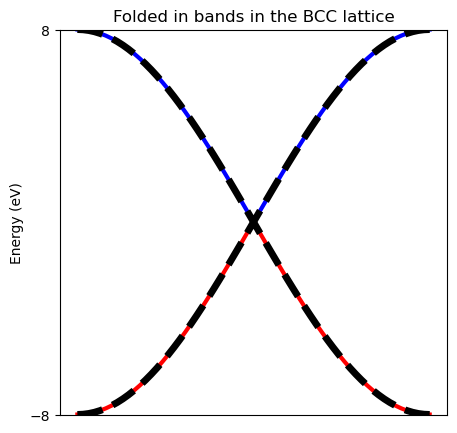

In [220]:
plt.figure(figsize=(5, 5))
plt.plot(energies_primitive_1, linestyle="solid", color="red", linewidth=3)
plt.plot(energies_primitive_2, linestyle="solid", color="blue", linewidth=3)

plt.plot(energies_conventional, linestyle="dashed", color="black", linewidth=5)

plt.yticks([8*t, -8*t]);
plt.ylim(8*t, -8*t)
plt.xticks([])
plt.title("Folded in bands in the BCC lattice");
plt.ylabel("Energy (eV)");